#**Stacking - XgBoost (Regression)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

**Code**

In [2]:
# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define base regressors
base_estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0))
    # ('lasso', Lasso(alpha=0.1)),
    # ('svr', SVR(kernel='linear')),  # Support Vector Regressor
    # ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))  # Extra Trees Regressor
]

In [5]:
# Create a stacking regressor with XGBoost as the final estimator
stacking_regressor = StackingRegressor(
    estimators=base_estimators,
    final_estimator=XGBRegressor(use_label_encoder=False, eval_metric='rmse'),  # Set eval_metric to avoid warning
    cv=5
)

In [6]:
# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:10:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_estimators=50,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(n_estimators=50,
                                                         random_state=42)),
                              ('lr', LinearRegression()), ('ridge', Ridge())],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               de...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

In [7]:
# Make predictions on the test set
y_pred = stacking_regressor.predict(X_test)
print(y_pred)

[0.5365263 0.7528651 5.039327  ... 4.818994  0.7084703 1.7172061]


In [8]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error of Stacking Regressor: {mse:.2f}')
print(f'R^2 Score of Stacking Regressor: {r2:.2f}')

Mean Squared Error of Stacking Regressor: 0.29
R^2 Score of Stacking Regressor: 0.78


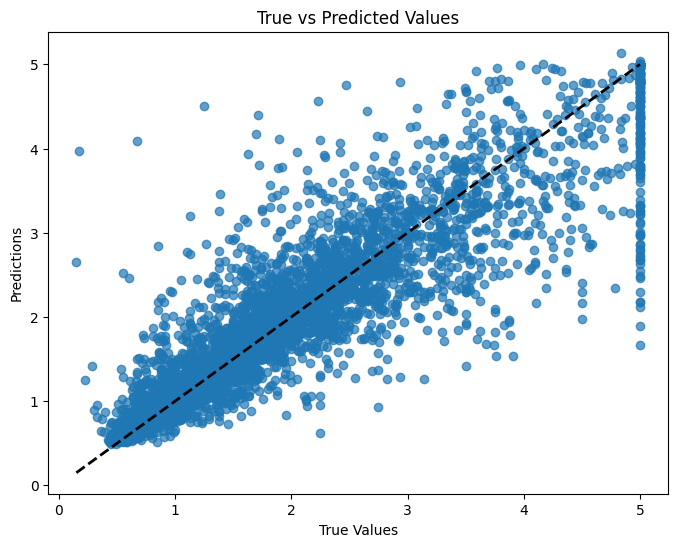

In [10]:
# Optional: Plotting true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()